### Code demo for Word Embeddings - Part 3
Eu Jin Lok

10 January 2018

# How does word embeddings add value to predictive models
In this notebook we will go into the details of how to build your own word embeddings, and use it as a powerful feature to improve you predictive model. For the full background on this topic, please checkout my blog post in this link: 
xxxxx

This is part 3, where we create a visualisation of the word embeddings when trainned on the News Groups dataset. The dataset can be obtained from Kaggle:

https://www.kaggle.com/crawford/20-newsgroups

So without further ado, lets begin.... oh and Happy New year 2018! 

In [13]:
#import the key libraries 
import re
import numpy as np 
import pandas as pd 
from gensim.models import word2vec
import nltk
from nltk.corpus import stopwords
import nltk.data
import logging
import os 
import sys
import seaborn as sns
import sklearn.manifold #Tsne plot 
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("C:\\Users\\User\\Dropbox\\Pet Project\\Blog\\word embeddings\\")
np.random.seed(789)

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Just one function to create the plot 
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

Load the pretrained word2vec object that we saved from part 2.

In [3]:
model = word2vec.Word2Vec.load("W2V_model_save_300features_40minwords_10context")

Now create the visualisation using T-SNE. The fitting takes awhile.... be patient

In [4]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

Ok so its done. Lets annotate all the word with the fitted xy coordinates so we can plot on the map...

In [5]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
    
# Check a few points to see if it has done things correctly
points.head(10)    

,word,x,y
0,rti,2.605824,5.272051
1,skies,3.648278,2.515700
2,raided,3.954033,-0.318419
3,possessions,1.657399,-3.682852
4,recipients,-0.841333,0.675444
5,summer,-3.417311,0.410895
6,counted,-0.825227,-2.258886
7,agent,-2.069245,-0.849443
8,uwo,-4.097722,-3.060569
9,corinthians,1.707175,-5.117279


Great, now lets see the full scatter plot of all the words

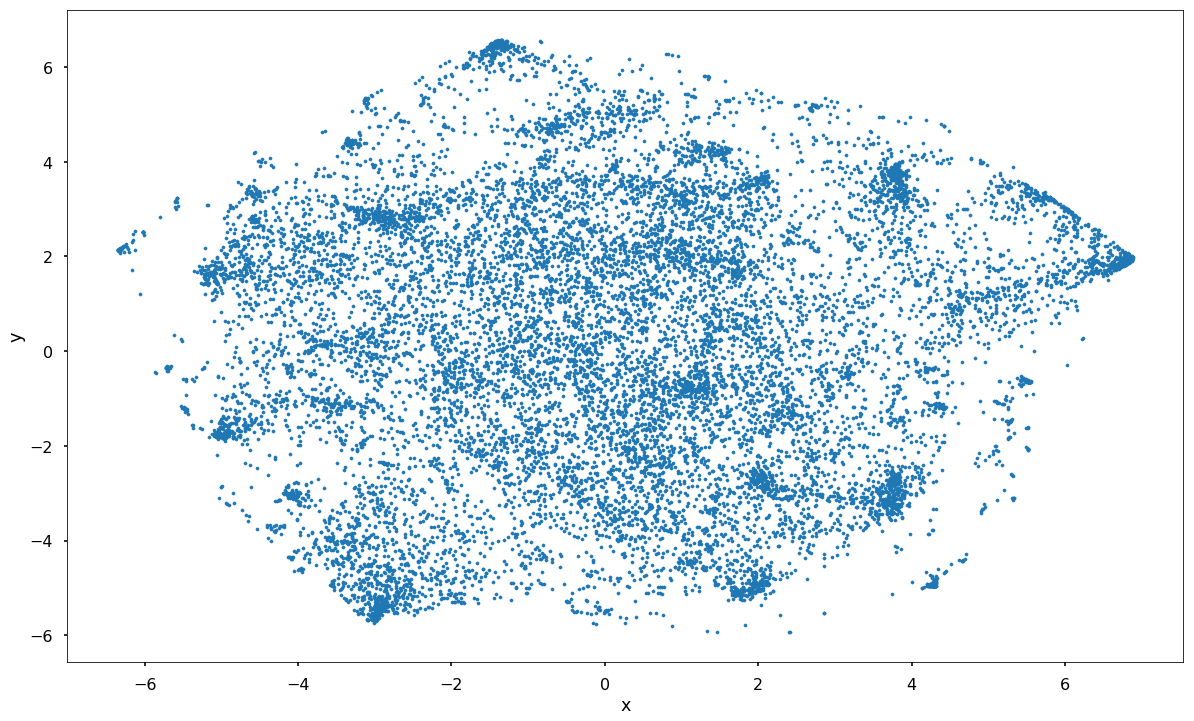

In [14]:
sns.set_context("poster")    
points.plot.scatter("x", "y", s=10, figsize=(20, 12))  

So its all over the place. Key thing is that there should be clumps around which is a signal to us that those words are closely related in some way. So lets take a part of the map where we see clumps, and zoom in. 

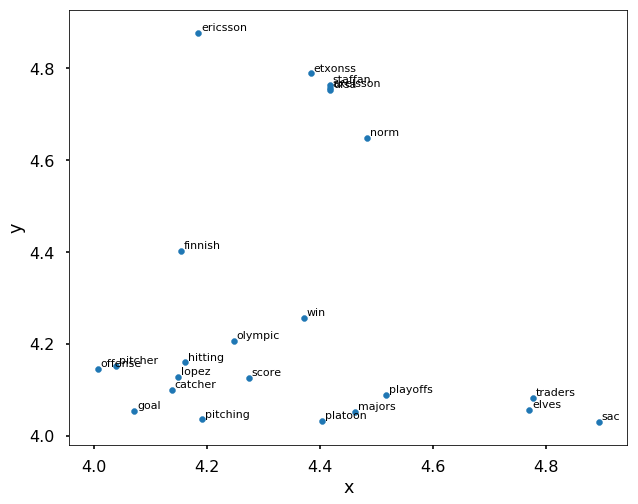

In [15]:
#check the top right bit
plot_region(x_bounds=(4, 5), y_bounds=(4, 5))

So the top left part of the map shows us words that seem to point to sports concepts. Words like 'pitching', 'score', 'olympic', 'win', 'playoffs' just to name a few, are all words to do with sports. 

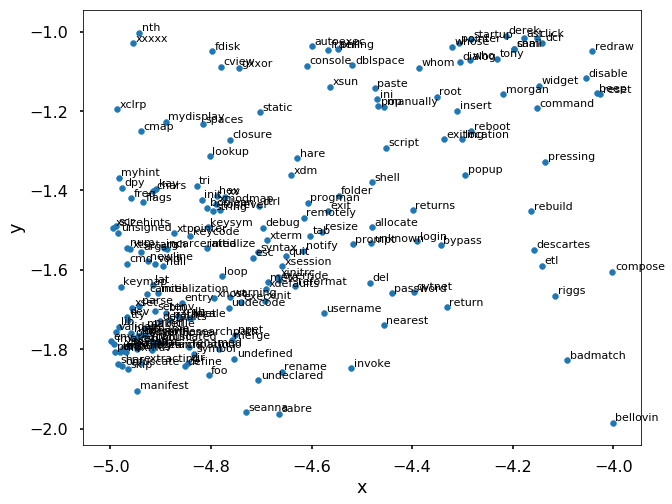

In [16]:
#check the top left bit
plot_region(x_bounds=(-5,-4), y_bounds=(-2,-1))

So the top left part of the map shows us words that seem to point to computer concepts. Words like 'username', 'shell', 'etl', 'xdm', 'invoke' just to name a few, are all words to do with computers or IT. 